In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import seaborn as sns

# Load data from the EGU workshop

In [2]:
df = pd.read_csv("../data/EGU_Prediction-making workshop questions cleaned.csv", header=[0, 1])
df

,Unnamed: 0_level_0,2024 Emissions 1,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,2050 Emissions 1,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,ZEC 1,...,Unnamed: 32_level_0,2100 temp 2,Unnamed: 34_level_0,Unnamed: 35_level_0,Unnamed: 36_level_0,2100 Emissions 2,Unnamed: 38_level_0,Unnamed: 39_level_0,Unnamed: 40_level_0,Meta questions
,Timestamp,"Realistically, what is the highest plausible answer?","Realistically, what is the lowest plausible answer?",What is your best guess?,What is the probability (in %) that it's between your highest and lowest answer?,"Realistically, what is the highest plausible answer?","Realistically, what is the lowest plausible answer?",What is your best guess?,What is the probability (in %) that it's between your highest and lowest answer?,"Realistically, what is the highest plausible answer?",...,What is the probability (in %) that it's between your highest and lowest answer?,"Realistically, what is the highest plausible answer?","Realistically, what is the lowest plausible answer?",What is your best guess?,What is the probability (in %) that it's between your highest and lowest answer?,"Realistically, what is the highest plausible answer?","Realistically, what is the lowest plausible answer?",What is your best guess?,What is the probability (in %) that it's between your highest and lowest answer?,Repeated Answer ZEC==Temp2100?
0,4/15/2024 8:48:18,47.0,38.0,44.00,80,60,20,35,60,0.7,...,80,0.7,0.0,0.30,75.0,25.0,-5.0,5.0,60.0,y
1,4/15/2024 8:50:47,47.0,37.0,43.00,80,15,5,8,70,0.1,...,80,0.1,-0.2,0.00,80.0,15.0,-10.0,8.0,70.0,y
2,4/15/2024 8:53:41,50.0,43.0,45.00,70,50,40,45,70,1.5,...,60,8.0,1.4,2.50,60.0,80.0,10.0,30.0,60.0,NaN
3,4/15/2024 8:55:52,44.0,40.0,42.00,95,60,20,30,75,0.5,...,70,0.5,0.2,0.30,70.0,4.0,2.0,3.0,70.0,y
4,4/15/2024 8:55:57,45.0,38.0,42.50,90,80,10,40,80,2.0,...,80,NaN,NaN,NaN,NaN,80.0,0.0,10.0,80.0,NaN
5,4/15/2024 8:56:00,50.0,30.0,40.00,100,50,30,40,100,4.0,...,90,5.0,0.0,2.50,90.0,50.0,10.0,20.0,90.0,y
6,4/15/2024 8:56:07,45.0,40.0,42.00,70,50,35,42,60,1.0,...,60,8.0,2.0,4.00,60.0,60.0,0.0,20.0,60.0,NaN
7,4/15/2024 8:56:36,44.0,38.0,41.00,95,55,25,37,85,2.1,...,60,4.5,1.8,2.30,70.0,70.0,-20.0,15.0,70.0,NaN
8,4/15/2024 8:57:04,45.0,35.0,41.00,95,60,-5,25,95,2.0,...,80,9.0,0.0,3.00,90.0,100.0,-40.0,0.0,85.0,NaN


In [3]:
previous_header = "Blank"
best = "What is your best guess?"
low = "Realistically, what is the lowest plausible answer?"
high = "Realistically, what is the highest plausible answer?"
probegu = "What is the probability (in %) that it's between your highest and lowest answer?"
probrgs = "What is the probability (in %) that the true value will be between your highest and lowest answer?"
new_columns = []
for level0, level1 in df.columns:
    if level0.startswith('Unnamed:'):
        new_columns.append((previous_header, level1))
    else:
        previous_header = level0
        new_columns.append((level0, level1))

# Set the new columns with updated levels
df.columns = pd.MultiIndex.from_tuples(new_columns)

In [4]:
# One of the questions was unfortunately repeated and some people answered it before this was clarified. 
# We'll remove the data from these answers
df.loc[df["Meta questions", "Repeated Answer ZEC==Temp2100?"] == "y", ["2100 temp 2"]] = np.nan
df.loc[df["Meta questions", "Repeated Answer ZEC==Temp2100?"] == "y", ["2100 temp 1"]] = np.nan

In [5]:
# Define the folder path
folder_path = "../output"

# Check if the folder exists
if not os.path.exists(folder_path):
    # Create the folder if it doesn't exist
    os.makedirs(folder_path)

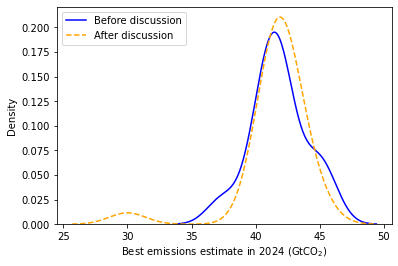

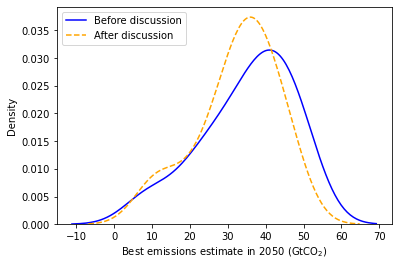

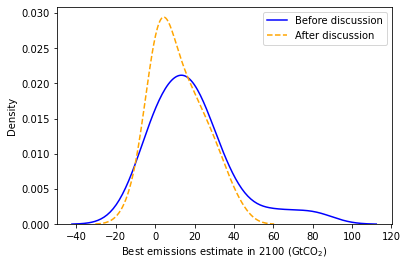

<Figure size 432x288 with 0 Axes>

In [6]:
for varstring in ["2024 Emissions ", "2050 Emissions ", "2100 Emissions ", ]:
    sns.kdeplot(df[varstring + "1", "What is your best guess?"], color='blue', linestyle='-', label='Data 1 KDE')
    sns.kdeplot(df[varstring + "2", "What is your best guess?"], color='orange', linestyle='--', label='Data 2 KDE')
    plt.xlabel(f"Best emissions estimate in {varstring[:4]} (GtCO$_2$)")
    plt.legend(["Before discussion", "After discussion"])
    plt.savefig(folder_path + "/Best_" + varstring[:-1] + ".png")
    plt.figure()

In [7]:
df["2024 Emissions 1", "What is your best guess?"].median()

42.0

In [8]:
df["2024 Emissions 1", "What is your best guess?"].mean()

41.810833333333335

In [9]:
df["2024 Emissions 2", "What is your best guess?"].median()

42.0

In [10]:
df["2024 Emissions 2", "What is your best guess?"].mean()

41.5625

In [11]:
egudf = df.copy()

# Load data from the second workshop at the Royal Geographical Society

In [12]:
rgsdf = pd.read_csv("../data/RGS_Prediction-making workshop questions cleaned.csv", header=[0, 1])
previous_header = "Blank"
new_columns = []
for level0, level1 in rgsdf.columns:
    if level0.startswith('Unnamed:'):
        new_columns.append((previous_header, level1.replace(probrgs, probegu)))
    else:
        previous_header = level0
        new_columns.append((level0, level1.replace(probrgs, probegu)))

# Set the new columns with updated levels
rgsdf.columns = pd.MultiIndex.from_tuples(new_columns)

In [13]:
combineddf = pd.concat([egudf, rgsdf]).reset_index(drop=True)

# Plot the data

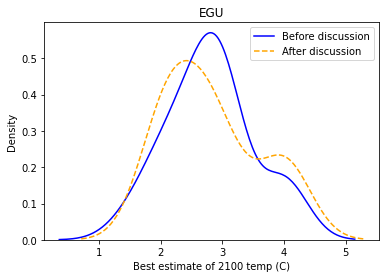

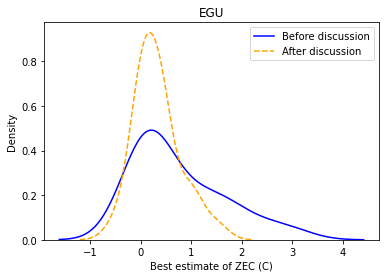

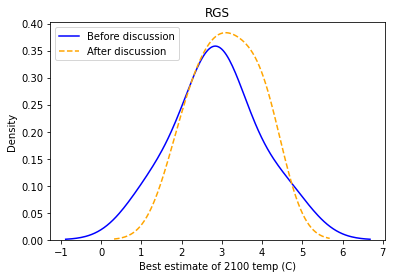

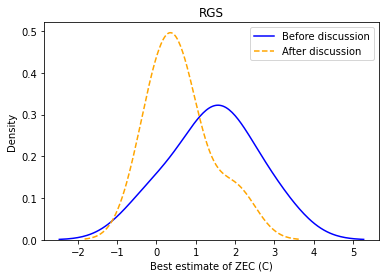

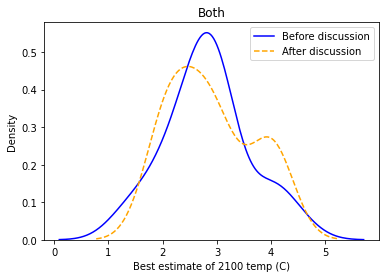

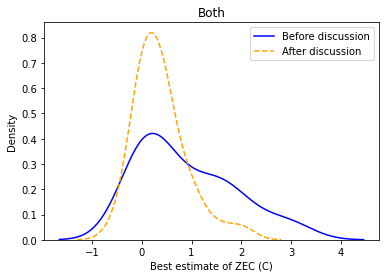

<Figure size 432x288 with 0 Axes>

In [14]:
for df, name in [(egudf, "EGU"), (rgsdf, "RGS"), (combineddf, "Both")]:
    for varstring in ["2100 temp ", "ZEC "]:
        sns.kdeplot(df[varstring + "1", "What is your best guess?"], color='blue', linestyle='-', label='Data 1 KDE')
        sns.kdeplot(df[varstring + "2", "What is your best guess?"], color='orange', linestyle='--', label='Data 2 KDE')
        plt.xlabel(f"Best estimate of {varstring[:-1]} (C)")
        plt.legend(["Before discussion", "After discussion"])
        plt.savefig(folder_path + "/Best_" + varstring[:-1] + name + ".png")
        plt.title(name)
        plt.figure()
    """
    for varstring in ["2100 temp ", "ZEC "]:
        sns.kdeplot(df[varstring + "1", low], color='blue', linestyle='-', label='Data 1 KDE')
        sns.kdeplot(df[varstring + "2", "Realistically, what is the lowest plausible answer?"], color='orange', linestyle='--', label='Data 2 KDE')
        plt.xlabel(f"Lowest plausible estimate of {varstring[:-1]} (C)")
        plt.legend(["Before discussion", "After discussion"])
        plt.savefig(folder_path + "/lowest_" + varstring[:-1] + name + ".png")
        plt.figure()
    for varstring in ["2100 temp ", "ZEC "]:
        sns.kdeplot(df[varstring + "1", "Realistically, what is the highest plausible answer?"], color='blue', linestyle='-', label='Data 1 KDE')
        sns.kdeplot(df[varstring + "2", "Realistically, what is the highest plausible answer?"], color='orange', linestyle='--', label='Data 2 KDE')
        plt.xlabel(f"Highest plausible estimate of {varstring[:-1]} (C)")
        plt.legend(["Before discussion", "After discussion"])
        plt.savefig(folder_path + "/highest_" + varstring[:-1] + name + ".png")
        plt.figure()
    """

# Compare with known values

In [15]:
# Look up best estimate of 2024 emissions from the Global Carbon Project (as of November 2024)
recem = 37.4 + 4.2
recem

41.6

In [16]:
# Compare this with predicted values

In [17]:
# Fraction within uncertainty
((rgsdf['2024 Emissions 2', low] < recem) & (rgsdf["2024 Emissions 2", high] > recem)).sum() / len(rgsdf)

0.8333333333333334

In [18]:
(rgsdf["2024 Emissions 2", high] > recem)

0    True
1    True
2    True
3    True
4    True
5    True
Name: (2024 Emissions 2, Realistically, what is the highest plausible answer?), dtype: bool

In [19]:
rgsdf["2024 Emissions 2", ]

C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\IPython\core\interactiveshell.py:2902: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


,"Realistically, what is the highest plausible answer?","Realistically, what is the lowest plausible answer?",What is your best guess?,What is the probability (in %) that it's between your highest and lowest answer?
0,55,42.0,46.0,80
1,42,41.0,41.5,90
2,50,40.0,45.0,90
3,46,41.5,43.0,80
4,43,40.0,42.0,80
5,48,39.0,44.0,80


In [20]:
((egudf['2024 Emissions 2', low] < recem) & (egudf["2024 Emissions 2", high] > recem)).sum() / len(egudf)

0.9583333333333334

In [21]:
egudf['2024 Emissions 2', high] 

0     48.0
1     48.0
2     45.0
3     44.0
4     43.5
5     50.0
6     50.0
7     45.0
8     45.0
9     48.0
10    46.0
11    43.0
12    48.0
13    48.0
14    42.0
15    45.0
16    50.0
17    43.0
18    55.0
19    43.0
20    43.0
21    41.0
22    50.0
23    46.0
Name: (2024 Emissions 2, Realistically, what is the highest plausible answer?), dtype: float64

In [22]:
# Fraction within 1: 
(abs(egudf['2024 Emissions 2', best] - recem) < 1).sum() / len(egudf)

0.6666666666666666

In [23]:
egudf["2024 Emissions 2", probegu].mean()

85.41666666666667

In [24]:
rgsdf["2024 Emissions 2", probegu].mean()

83.33333333333333

In [25]:
(abs(rgsdf['2024 Emissions 2', "What is your best guess?"] - recem) < 1).sum()

2

In [26]:
namecolordict = {"EGU": "blue",  "RGS": "green", "Both": "teal"}

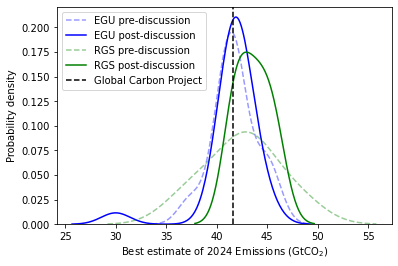

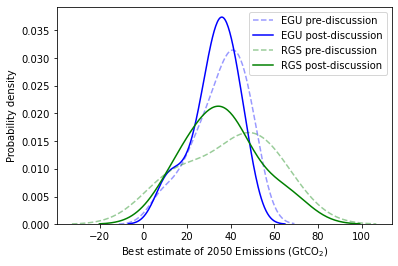

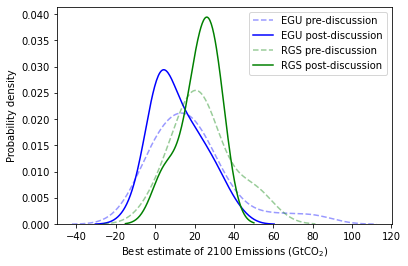

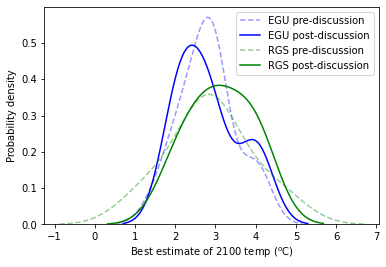

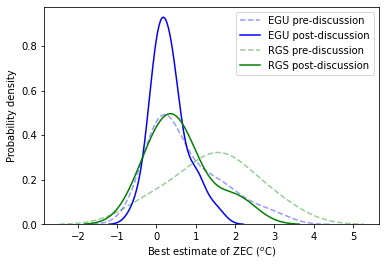

<Figure size 432x288 with 0 Axes>

In [27]:
for varstring, unit in [
    ('2024 Emissions ', "GtCO$_2$"), ('2050 Emissions ', "GtCO$_2$"), 
    ('2100 Emissions ', "GtCO$_2$"), ("2100 temp ", "$^o$C"), ("ZEC ", "$^o$C"), 
]:
    legstring = []
    for df, name in [(egudf, "EGU"), (rgsdf, "RGS")]:
        sns.kdeplot(df[varstring + "1", "What is your best guess?"], color=namecolordict[name], linestyle="--", alpha = 0.4)
        sns.kdeplot(df[varstring + "2", "What is your best guess?"], color=namecolordict[name])
        plt.xlabel(f"Best estimate of {varstring[:-1]} ({unit})")
        plt.ylabel("Probability density")
        legstring.append(name + " pre-discussion")
        legstring.append(name + " post-discussion")
    if varstring=="2024 Emissions ":
        plt.axvline(recem, linestyle="--", color="black")
        legstring.append("Global Carbon Project")
    plt.legend(legstring)
    plt.savefig(folder_path + "/Best_" + varstring[:-1] + "_Comparison.png")
    plt.figure()

In [28]:
# Define a function to compute the two-sided normal distribution PDF
from scipy.stats import skewnorm
from scipy.optimize import minimize
# Objective function to minimize the difference between given and calculated quantiles
q1 = 0.2
q3 = 1 - q1
stdquantiles = [q1, 0.5, q3]
# To improve convergence we normalise the parameters
def scaledskewnormppf(q, alpha, xi, omega):
    return skewnorm.ppf(q, alpha/100000, loc=xi*10, scale=omega)
def scaledskewnormpdf(q, alpha, xi, omega):
    return skewnorm.pdf(q, alpha/100000, loc=xi*10, scale=omega)
def metaobjective(params, target):
    xi, omega, alpha = params
    calc_quantiles = scaledskewnormppf(stdquantiles, alpha, xi, omega)
    return np.sum((target - calc_quantiles) ** 2)

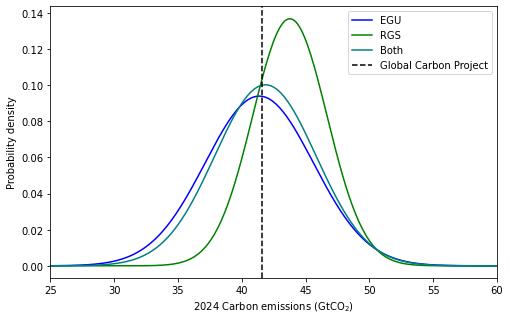

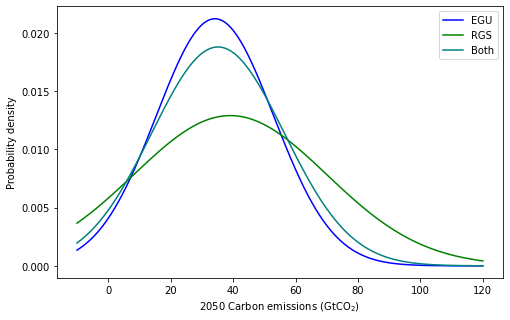

In [29]:
# Standardise the intervals
xs = np.linspace(-10, 120, 1000)
standard_results = {}
for varstring, initial_guess in [('2024 Emissions ', [4, 5, 2] ), ('2050 Emissions ', [3, 10, -1])]:
    plt.figure(figsize=(8, 5))
    legstring = []
    for df, name in [(egudf, "EGU"), (rgsdf, "RGS"), (combineddf, "Both")]:
        meanresult = df[varstring + "2", best]
        # Convert the percentage into a probability and rescale the probability interval to the desired value
        linearRatio = (q3 - q1) / (df[varstring + "2", probegu] / 100)
        df[varstring + "2", "q1"] = meanresult - linearRatio * (meanresult - df[varstring + "2", low])
        df[varstring + "2", "q3"] = meanresult + linearRatio * (df[varstring + "2", high] - meanresult)
        # Minimize the objective function
        target = np.array([
            df[varstring + "2", "q1"].mean(), df[varstring + "2", best].mean(), df[varstring + "2", "q3"].mean()
        ])
        def objective(params): 
            return metaobjective(params, target)
        result = minimize(objective, initial_guess, method='Nelder-Mead', tol=0.000000001)
        # Calculate the median to be sure it's OK.
        xi, omega, alpha = result.x
        pdf_values = scaledskewnormpdf(xs, alpha, xi, omega)
        target_results = scaledskewnormppf(stdquantiles, alpha, xi, omega)
        #assert np.allclose(target_results, target, atol=0.3)
        standard_results[varstring, name] = result.x
        plt.plot(xs, pdf_values, color=namecolordict[name])
        legstring.append(name)
    if varstring=="2024 Emissions ":
        plt.axvline(recem, linestyle="--", color="black")
        legstring.append("Global Carbon Project")
        plt.xlim([25, 60])
    plt.legend(legstring)
    plt.xlabel(f"{varstring[:4]} Carbon emissions (GtCO$_2$)")
    plt.ylabel("Probability density")
    plt.savefig(f"../output/Standardised_est_{varstring.replace(' ', '_')}.png")

In [30]:
rgsdf.mean()

C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


lower Emissions 2024-1990  Realistically, what is the highest plausible answer?                                35.000000
                           Realistically, what is the lowest plausible answer?                                  2.000833
                           What is your best guess?                                                            11.500000
                           What is the probability (in %) that it's between your highest and lowest answer?    81.666667
2024 Emissions 1           Realistically, what is the highest plausible answer?                                47.783333
                           Realistically, what is the lowest plausible answer?                                 38.083333
                           What is your best guess?                                                            42.500000
                           What is the probability (in %) that it's between your highest and lowest answer?    77.500000
2050 Emissions 1           Reali

In [31]:
# calculate prediction score using the Continuous Ranked Probability Score
def calculate_crps(xs, pdf, trueval):
    pdf /= np.trapz(pdf, xs)
    cdf = np.cumsum(pdf) * np.diff(xs)[0]
    heaviside = (xs >= trueval).astype(float)
     # Compute the squared differences
    squared_diff = (cdf - heaviside) ** 2
    # Integrate to compute the CRPS
    crps = np.trapz(squared_diff, xs)

    return crps

In [32]:
for name in ["EGU", "RGS", "Both"]:
    xi, omega, alpha = standard_results["2024 Emissions ", name]
    pdf = scaledskewnormpdf(xs, alpha, xi, omega)
    print(f"{name} scores {calculate_crps(xs, pdf, recem):.4g}")

EGU scores 1
RGS scores 1.265
Both scores 0.9337


# Estimate the number of countries with falling emissions 1990-2023
At RGS we also asked this question. We can formally evaluate it using data from the Global Carbon Project as well

In [33]:
co2ff = pd.read_excel(
    "../data/National_Fossil_Carbon_Emissions_2024v1.0.xlsx", sheet_name="Territorial Emissions", header=11, index_col=0
)
co2ff

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Asia,Central America,Europe,Middle East,North America,Oceania,South America,Bunkers,Statistical Difference,World
1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000069,0.000000,...,0.004012,0.000000,48.246497,0.000000,5.418000,0.030582,0.025689,0.000000,-1.421085e-14,53.724780
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,47.450609,0.000000,6.742000,0.029033,0.030144,0.000000,-7.105427e-15,54.251787
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,49.244738,0.000000,7.335000,0.028945,0.049365,0.000000,0.000000e+00,56.658049
1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,50.956189,0.000000,8.260000,0.041572,0.031804,0.000000,-7.105427e-15,59.289565
1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,60.471033,0.000000,9.084000,0.050089,0.001471,0.000000,1.421085e-14,69.606593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,3.024460,1.316178,44.110389,0.132000,4.054412,0.040000,0.175000,48.237649,1.715096,0.243000,...,4957.223871,48.842337,1483.868434,716.256142,1720.689315,126.108584,285.047033,344.900024,2.330580e-12,10064.256922
2020,3.244559,1.369741,41.589597,0.102000,3.618924,0.039000,0.169000,45.004095,1.854674,0.243000,...,4905.769572,42.095179,1371.891664,672.901083,1548.022431,120.582685,256.689277,237.525371,2.103206e-12,9510.744248
2021,2.989861,1.324687,44.919126,0.111234,4.166064,0.039491,0.174330,51.268855,2.048839,0.236459,...,5173.021939,45.372156,1447.695384,711.192505,1640.767617,117.771693,286.133449,248.656333,-3.694822e-13,10047.458624
2022,3.121045,1.352420,46.430680,0.115340,4.477319,0.038042,0.173138,54.613213,1.978847,0.234842,...,5202.415016,45.358304,1427.265056,726.859752,1661.252730,115.961720,290.825462,283.510584,2.501110e-12,10130.804084


In [34]:
co2afolu = pd.read_excel(
    "../data/National_LandUseChange_Carbon_Emissions_2024v1.0.xlsx", sheet_name="OSCAR", header=7, index_col=0
)
co2afolu

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vatican City,Venezuela,Viet Nam,Yemen,Zambia,Zimbabwe,OTHER,DISPUTED,Global,EU27
unit: Tg C/year,,,,,,,,,,,,,,,,,,,,,
1850,1.26311,0.16368,-0.78250,0.00295,1.41165,0.00020,5.10876,0.21505,21.16205,0.67247,...,0,7.88985,9.94348,-0.14137,2.11316,0.06070,0.00061,0.04585,571.99858,51.50667
1851,1.28030,0.16839,-0.78748,0.00292,1.39130,0.00021,5.28939,0.21326,21.56980,0.67616,...,0,13.13036,10.00648,-0.13829,2.12241,0.06326,0.00089,0.06251,614.01756,50.69561
1852,1.29485,0.17168,-0.79246,0.00294,1.35743,0.00020,5.46257,0.21199,19.90688,0.66926,...,0,13.95292,10.14444,-0.13472,2.12656,0.06455,0.00083,0.06264,622.57806,50.88412
1853,1.30888,0.17292,-0.79739,0.00293,1.31405,0.00018,5.62342,0.21140,20.99811,0.65518,...,0,16.21016,10.27069,-0.13160,2.12974,0.06568,0.00108,0.04223,631.00250,50.64944
1854,1.32258,0.17222,-0.80221,0.00272,1.31994,0.00015,5.78714,0.21105,20.97577,0.64271,...,0,15.92809,10.31045,-0.12893,2.13206,0.06677,0.00107,0.04902,631.76750,50.37093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,1.27163,-0.00356,-0.61440,-0.00210,42.32752,-0.00120,-5.58394,0.38546,-5.41179,-0.76486,...,0,11.26990,21.37605,0.09354,12.55050,3.66857,0.00472,0.06709,1197.73761,-2.60319
2020,1.33172,-0.02382,-0.63438,-0.00218,41.43349,-0.00115,-6.69380,0.37071,-1.09524,-0.76968,...,0,10.82951,19.78071,0.09467,12.43731,3.39247,0.00433,0.06257,1099.12151,-6.63115
2021,1.00037,-0.03347,-0.56765,-0.00199,41.14360,-0.00112,-6.33307,0.36355,-0.27540,-0.54135,...,0,11.71258,19.20598,0.09366,12.19308,3.14378,0.00409,0.06488,1104.75272,-0.48342


In [35]:
co2 = co2afolu + co2ff
co2

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Viet Nam,Wallis and Futuna Islands,World,Yemen,Zambia,Zimbabwe
unit: Tg C/year,,,,,,,,,,,,,,,,,,,,,
1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215119,...,2.496557,NaN,NaN,NaN,9.943480,NaN,NaN,NaN,NaN,NaN
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213260,...,2.506390,NaN,NaN,NaN,10.006480,NaN,NaN,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211990,...,2.515910,NaN,NaN,NaN,10.144440,NaN,NaN,NaN,NaN,NaN
1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211400,...,2.526250,NaN,NaN,NaN,10.270690,NaN,NaN,NaN,NaN,NaN
1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211050,...,2.536740,NaN,NaN,NaN,10.310450,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,4.296090,NaN,1.312618,43.495989,0.129900,46.381932,NaN,0.173800,42.653709,2.100556,...,30.412908,0.035990,NaN,30.290558,114.262954,NaN,NaN,2.958019,14.665900,6.336536
2020,4.576279,NaN,1.345921,40.955217,0.099820,45.052414,NaN,0.167850,38.310295,2.225384,...,30.738068,0.040860,NaN,23.336488,118.603623,NaN,NaN,2.618166,14.660112,5.534839
2021,3.990231,NaN,1.291217,44.351476,0.109244,45.309664,NaN,0.173210,44.935785,2.412389,...,34.129394,0.075226,NaN,25.605352,113.634330,NaN,NaN,2.845805,14.327131,5.932535


In [36]:
ratio_2023_1990 = co2.loc[2023, :] / co2.loc[1990, :]
ratio_2023_1990 = ratio_2023_1990[np.isfinite(ratio_2023_1990)]
ratio_2023_1990

Afghanistan    2.328067
Albania        0.751644
Algeria        2.085698
Andorra        1.035982
Angola         7.990799
                 ...   
Venezuela      0.544914
Viet Nam       7.359695
Yemen          1.137605
Zambia         1.653457
Zimbabwe       0.672510
Length: 189, dtype: float64

In [37]:
(ratio_2023_1990 < 1).sum() / len(ratio_2023_1990)

0.4126984126984127

In [38]:
ffratio = co2ff.loc[2023, :] / co2ff.loc[1990, :]
lowerffs = ffratio[np.isfinite(ffratio) & (ffratio<1)]
len(lowerffs) / len(ffratio[np.isfinite(ffratio)])

0.273542600896861

In [39]:
ffratio

Afghanistan               5.927602
Albania                   0.901310
Algeria                   2.149170
Andorra                   1.054612
Angola                    3.251491
                            ...   
Oceania                   1.372490
South America             1.793792
Bunkers                   2.067673
Statistical Difference   -2.400000
World                     1.652969
Length: 230, dtype: float64

In [40]:
recem

41.6

In [41]:
rgsdf

Blank                            lower Emissions 2024-1990  \
            Timestamp Realistically, what is the highest plausible answer?   
0  8/29/2024 16:21:57                                                 60     
1  8/29/2024 16:22:55                                                 60     
2  8/29/2024 16:23:06                                                 10     
3  8/29/2024 16:25:06                                                 10     
4  8/29/2024 16:26:09                                                 50     
5  8/29/2024 16:30:20                                                 20     

                                                       \
  Realistically, what is the lowest plausible answer?   
0                                             10.000    
1                                              1.000    
2                                              0.000    
3                                              0.005    
4                                              1.000    
5                                              0.000    

                            \
  What is your best guess?   
0                       35   
1                       10   
2                        1   
3                        6   
4                       12   
5                        5   

                                                                                    \
  What is the probability (in %) that it's between your highest and lowest answer?   
0                                                 80                                 
1                                                 80                                 
2                                                 90                                 
3                                                 80                                 
4                                                 70                                 
5                                                 90                                 

                                      2024 Emissions 1  \
  Realistically, what is the highest plausible answer?   
0                                               47.0     
1                                               50.0     
2                                               60.0     
3                                               45.7     
4                                               38.0     
5                                               46.0     

                                                       \
  Realistically, what is the lowest plausible answer?   
0                                               35.0    
1                                               35.0    
2                                               40.5    
3                                               41.5    
4                                               36.5    
5                                               40.0    

                            \
  What is your best guess?   
0                       43   
1                       40   
2                       48   
3                       43   
4                       37   
5                       44   

                                                                                    \
  What is the probability (in %) that it's between your highest and lowest answer?   
0                                                 90                                 
1                                                 80                                 
2                                                 80                                 
3                                                 70                                 
4                                                 70                                 
5                                                 75                                 

                                      2050 Emissions 1  ...  \
  Realistically, what is the highest plausible answer?  ...   
0                         

Only 3 geographers got the answer to this question within confidence intervals! It wasn't asked to geoscientists, so there is no comparison point. 